In [76]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")

meta_new = pd.read_csv("dat/bias2/ASD.Meta.Spec.bias.csv") # Load Bias
meta_new = meta_new.set_index("STR")
meta_new.head(2)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.459557,Hippocampal_region,1
Field_CA1,0.434854,Hippocampal_region,2


In [78]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
adj_mat_local, adj_mat_distal = LocalDistal_Region()
g_local_region = LoadConnectome2(ConnFil=adj_mat_local)
g_distal_region = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local_region = EdgeDict(g_local_region, keyon="label")
EdgeWeightsDict_distal_region = EdgeDict(g_distal_region, keyon="label")

In [79]:
# ASD
CandidateSTRs = meta_new.head(50).index.values
asd_scores = ScoreSTRSet(g, CandidateSTRs, EdgeWeightsDict)
print("Total   % .3f"% np.mean(asd_scores))
asd_scores = ScoreSTRSet(g_local_region, CandidateSTRs, EdgeWeightsDict_local_region)
print("Local   % .3f"% np.mean(asd_scores))
asd_scores = ScoreSTRSet(g_distal_region, CandidateSTRs, EdgeWeightsDict_distal_region)
print("Distal  % .3f"% np.mean(asd_scores))

Total    0.367
Local    0.535
Distal   0.294


In [87]:
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits2/ASD_Pad1_SA.csv"
Weighted = False; Direction = False
InCirtuitNodes = GetBestCoheSAFil(SA_wd, Weighted, Direction, g=g, EdgeWeightsDict=EdgeWeightsDict)
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.382
Local      0.432
Distal     0.310


In [88]:
print(len(InCirtuitNodes))

35


In [89]:
InCirtuitNodes

array(['Orbital_area_lateral_part', 'Prelimbic_area',
       'Orbital_area_ventrolateral_part', 'Dorsal_peduncular_area',
       'Infralimbic_area', 'Nucleus_accumbens',
       'Anterior_olfactory_nucleus', 'Accessory_olfactory_bulb',
       'Lateral_posterior_nucleus_of_the_thalamus',
       'Endopiriform_nucleus_dorsal_part', 'Claustrum',
       'Primary_visual_area', 'Subiculum_dorsal_part',
       'Agranular_insular_area_ventral_part', 'Anteromedial_visual_area',
       'Primary_somatosensory_area_lower_limb', 'Primary_motor_area',
       'Anterior_cingulate_area_dorsal_part', 'Gustatory_areas',
       'Nucleus_of_reuniens', 'Parafascicular_nucleus',
       'Secondary_motor_area',
       'Retrosplenial_area_lateral_agranular_part', 'Caudoputamen',
       'Orbital_area_medial_part', 'Frontal_pole_cerebral_cortex',
       'Visceral_area', 'Basolateral_amygdalar_nucleus',
       'Agranular_insular_area_posterior_part',
       'Submedial_nucleus_of_the_thalamus',
       'Anterior_cingu

In [16]:
JW_ExpMat = "../dat/allen-mouse-exp/jon/energy-conn-model-no_log-no_quant_norm.csv"
JW_ExpMat = pd.read_csv(JW_ExpMat, index_col="ROW")
JW_ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv"
JW_ExpMatNorm = pd.read_csv(JW_ExpMatNorm, index_col="ROW")

In [32]:
Jon_ExpMat = "../dat/allen-mouse-exp/jon/exp_level-before_norm.csv"
Jon_ExpMat = pd.read_csv(Jon_ExpMat, index_col="ROW")
Jon_ExpMatNorm = "../dat/allen-mouse-exp/jon/exp_level-after_norm.csv"
Jon_ExpMatNorm = pd.read_csv(Jon_ExpMatNorm, index_col="ROW")

In [17]:
JW_ExpMat.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.089402,0.060138,0.050112,0.023204,0.034093,0.088305,0.036078,NaN,0.046813,0.032990,...,0.035584,0.179587,0.021418,0.030367,0.115622,0.036984,0.053407,0.033779,0.110354,0.134065
2,0.040017,0.014211,0.023246,0.024009,0.403265,0.025202,0.354581,0.058713,0.145883,0.022381,...,0.043141,0.005781,0.213674,0.052746,0.038968,0.016603,0.018719,0.035381,0.122850,1.065840


In [18]:
dat1 = JW_ExpMat["Anterior_amygdalar_area"].values
dat2 = Jon_ExpMat["Anterior_amygdalar_area"].values
def rm_nan_and_pearsonr(dat1, dat2):
    tmp1, tmp2 = [], []
    for v1, v2 in zip(dat1, dat2):
        if v1 != v1 or v2 != v2:
            continue
        else:
            tmp1.append(v1)
            tmp2.append(v2)
    return pearsonr(tmp1, tmp2)
print(rm_nan_and_pearsonr(dat1, dat2))

(0.911201393837356, 0.0)


In [39]:
dat1 = JW_ExpMatNorm["Anterior_amygdalar_area"].values
dat2 = Jon_ExpMat["Anterior_amygdalar_area"].values
print(rm_nan_and_pearsonr(dat1, dat2))

(0.9692945557075049, 0.0)


In [20]:
# Norm Neuron

In [33]:
cell_comp = pd.read_csv("../dat/cell_composition/Cell_Atlas_for_the_Mouse_brain_2.csv", index_col="Regions")
STRs = cell_comp.index.values
STRs = [modify_str(x) for x in STRs]
cell_comp.index = STRs
STRs = [x.strip() for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/Structures.txt", 'rt')]
STR_cell_comp = cell_comp[cell_comp.index.isin(STRs)]

In [34]:
# Norm
df = Jon_ExpMat.copy(deep=True)
for c in df.columns.values:
    neuro_count = cell_comp.loc[c, "Neurons [mm-3]"]
    df[c] = (df[c]/neuro_count) * (10**5)

In [35]:
# Log
for c in df.columns.values:
    df[c] = np.log2(1+df[c])

In [36]:
# QUNTILE
df = quantileNormalize(df)

In [37]:
dat1 = df["Anterior_amygdalar_area"].values
dat2 = Jon_ExpMatNorm["Anterior_amygdalar_area"].values
print(rm_nan_and_pearsonr(dat1, dat2))

(0.9674530944770965, 0.0)


In [38]:
STR = "Nucleus_accumbens"
dat1 = df[STR].values
dat2 = Jon_ExpMatNorm[STR].values
print(rm_nan_and_pearsonr(dat1, dat2))

(0.9675096104052767, 0.0)


In [40]:
df_z = []
df = Jon_ExpMat.copy(deep=True)
for i in df.index.values :
    i_z = ZscoreConverting(df.loc[i,:].values)
    df_z.append(i_z)
df_z = pd.DataFrame(data=df_z, columns=df.columns.values, index=df.index.values)

In [41]:
Aggregate = pd.read_csv("../dat/genes/asd/DenovoWEST_TADA.txt", delimiter="\t")
Aggregate['pDenovoWEST'] = pd.to_numeric(Aggregate["pDenovoWEST"], errors='coerce')
Agg_gene2None, Agg_gene2MutN = Aggregate_Gene_Weights(Aggregate, out = "dat/bias2/meta.gene.weights.csv")

In [64]:
Agg_Match = MakeMatchDF(Agg_gene2MutN, N=1000)
ASD_Meta_Spec = AvgSTRZ_Weighted(df_z, Agg_gene2MutN, Match_DF=Agg_Match, Method = 2,
                                              csv_fil = "dat/bias/ASD.Meta.Spec.bias.diff.csv")
RD_Agg_avgZ_RD = RegionDistributions(ASD_Meta_Spec.set_index("STR"), show=True)

Isocortex 	 19 	 Prelimbic_area; Orbital_area_lateral_part; Infralimbic_area; Orbital_area_ventrolateral_part; Primary_visual_area; Anterior_cingulate_area_dorsal_part; Primary_somatosensory_area_lower_limb; Anteromedial_visual_area; Orbital_area_medial_part; Primary_motor_area; Retrosplenial_area_lateral_agranular_part; Visceral_area; Gustatory_areas; Secondary_motor_area; Agranular_insular_area_ventral_part; Anterior_cingulate_area_ventral_part; Posterior_parietal_association_areas; Primary_somatosensory_area_trunk; Lateral_visual_area
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Olfactory_areas 	 3 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb
Pallidum 	 1 	 Bed_nuclei_of_the_stria_terminalis
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Mediodorsal_nucleus_of_thalamus; Submedial_nucleus_of_the_thalamus
Midbrain 	 1 	 Anterior_pretectal_nucleus
Striatum 	 7 	 Nucleus_

In [65]:
ASD_Meta_Spec = ASD_Meta_Spec.set_index("STR")
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)

,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [66]:
jon50 = set(meta_jon.head(50).index.values)
jw50 = set(ASD_Meta_Spec.head(50).index.values)

In [67]:
ASD_Meta_Spec.head(200)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.528232,Hippocampal_region,1
Prelimbic_area,0.464738,Isocortex,2
Field_CA1,0.453302,Hippocampal_region,3
Orbital_area_lateral_part,0.443268,Isocortex,4
Infralimbic_area,0.433055,Isocortex,5
...,...,...,...
Nucleus_prepositus,-0.468327,Medulla,196
Tegmental_reticular_nucleus,-0.477183,Pons,197
Lateral_reticular_nucleus,-0.479135,Medulla,198


In [68]:
print(len(jon50.intersection(jw50)))

49


(0.9985797297698765, 1.099386750125291e-270)

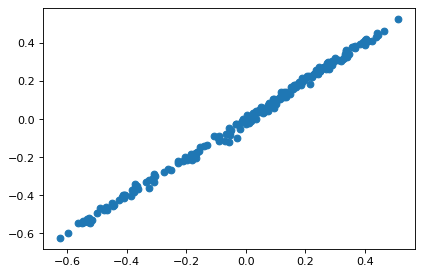

In [69]:
dat1 = []
dat2 = []
for i, row in meta_jon.iterrows():
    dat1.append(row["EFFECT"])
    dat2.append(ASD_Meta_Spec.loc[i, "EFFECT"])
plt.scatter(dat1, dat2)
pearsonr(dat1, dat2)

In [70]:
df_z.to_csv("../dat/allen-mouse-exp/energy-zscore-conn-model.0524.csv")